In [2]:
pip install yt_dlp xlsxwriter

Note: you may need to restart the kernel to use updated packages.


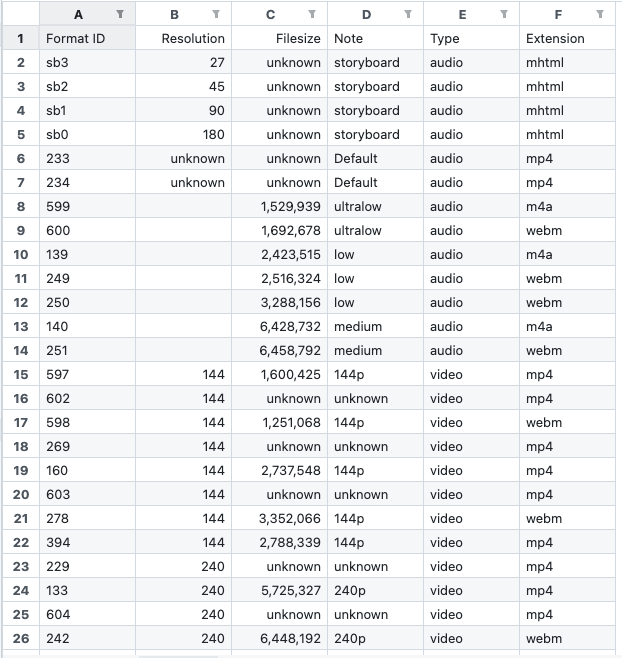

In [4]:
import yt_dlp
import xlsxwriter
import os

url = "https://youtu.be/cAL-Z_FfObI?si=ZxsGC75_kqkHLRPn"

# Define options to list available formats
list_opts = {
    'listformats': False,  # Do not use the built-in listformats to allow more detailed output
}

try:
    # List available formats
    with yt_dlp.YoutubeDL(list_opts) as ydl:
        info = ydl.extract_info(url, download=False)
        formats = info.get('formats', [])
        print("Available formats:")

        # Create a workbook and add a worksheet
        workbook = xlsxwriter.Workbook('available_formats.xlsx')
        worksheet = workbook.add_worksheet()

        # Write headers
        worksheet.write('A1', 'Format ID')
        worksheet.write('B1', 'Resolution')
        worksheet.write('C1', 'Filesize')
        worksheet.write('D1', 'Note')
        worksheet.write('E1', 'Type')
        worksheet.write('F1', 'Extension')

        # Write format details to worksheet
        row = 1
        for f in formats:
            format_id = f['format_id']
            resolution = f.get('height', 'audio only') if 'height' in f else 'unknown'
            filesize = f.get('filesize', 'unknown')
            format_note = f.get('format_note', 'unknown')
            ext = f.get('ext', 'unknown')
            media_type = 'audio' if f.get('vcodec', 'none') == 'none' else 'video'

            # Print to console
            print(f"Format ID: {format_id}, Resolution: {resolution}, Filesize: {filesize}, Note: {format_note}, Type: {media_type}, Extension: {ext}")

            # Write to Excel file
            worksheet.write(row, 0, format_id)
            worksheet.write(row, 1, resolution)
            worksheet.write(row, 2, filesize)
            worksheet.write(row, 3, format_note)
            worksheet.write(row, 4, media_type)
            worksheet.write(row, 5, ext)
            row += 1

        # Close the workbook
        workbook.close()
        print("Format list saved to available_formats.xlsx")

    # Prompt the user to select a video format
    selected_video_format = input("Enter the video format ID you want to download: ")

    # Find the selected video format in the formats list
    video_format = next((f for f in formats if f['format_id'] == selected_video_format), None)
    if not video_format:
        raise ValueError("Invalid video format ID selected.")

    # Define options to download the selected video format with throttled download speed
    video_output = 'video_only.' + video_format['ext']
    ydl_opts_video = {
        'format': selected_video_format,  # Use the selected format ID for video
        'outtmpl': video_output,  # Output file name format for video
        'ratelimit': 500000,  # Limit download speed to 500 KB/s
    }

    # Download the video in the selected format
    with yt_dlp.YoutubeDL(ydl_opts_video) as ydl:
        ydl.download([url])
    print("Video downloaded successfully!")

    # Prompt the user to select an audio format
    selected_audio_format = input("Enter the audio format ID you want to download: ")

    # Find the selected audio format in the formats list
    audio_format = next((f for f in formats if f['format_id'] == selected_audio_format), None)
    if not audio_format:
        raise ValueError("Invalid audio format ID selected.")

    # Define options to download the selected audio format
    audio_output = 'audio_only.' + audio_format['ext']
    ydl_opts_audio = {
        'format': selected_audio_format,  # Use the selected format ID for audio
        'outtmpl': audio_output,  # Output file name format for audio
        'ratelimit': 500000,  # Limit download speed to 500 KB/s
    }

    # Download the audio in the selected format
    with yt_dlp.YoutubeDL(ydl_opts_audio) as ydl:
        ydl.download([url])
    print("Audio downloaded successfully!")

    # Merge video and audio using ffmpeg
    merged_output = 'final_output.mp4'
    os.system(f"ffmpeg -i {video_output} -i {audio_output} -c:v copy -c:a aac -strict experimental {merged_output}")
    print(f"Video and audio merged successfully into {merged_output}!")

except Exception as e:
    print(f"An error occurred: {e}")


[youtube] Extracting URL: https://youtu.be/cAL-Z_FfObI?si=ZxsGC75_kqkHLRPn
[youtube] cAL-Z_FfObI: Downloading webpage
[youtube] cAL-Z_FfObI: Downloading tv client config
[youtube] cAL-Z_FfObI: Downloading player 9a279502-main
[youtube] cAL-Z_FfObI: Downloading tv player API JSON
[youtube] cAL-Z_FfObI: Downloading ios player API JSON
[youtube] cAL-Z_FfObI: Downloading m3u8 information


Available formats:
Format ID: sb3, Resolution: 27, Filesize: unknown, Note: storyboard, Type: audio, Extension: mhtml
Format ID: sb2, Resolution: 45, Filesize: unknown, Note: storyboard, Type: audio, Extension: mhtml
Format ID: sb1, Resolution: 90, Filesize: unknown, Note: storyboard, Type: audio, Extension: mhtml
Format ID: sb0, Resolution: 180, Filesize: unknown, Note: storyboard, Type: audio, Extension: mhtml
Format ID: 233, Resolution: unknown, Filesize: unknown, Note: Default, low, Type: audio, Extension: mp4
Format ID: 234, Resolution: unknown, Filesize: unknown, Note: Default, high, Type: audio, Extension: mp4
Format ID: 249, Resolution: None, Filesize: 1626053, Note: low, Type: audio, Extension: webm
Format ID: 250, Resolution: None, Filesize: 2069471, Note: low, Type: audio, Extension: webm
Format ID: 140, Resolution: None, Filesize: 4015327, Note: medium, Type: audio, Extension: m4a
Format ID: 251, Resolution: None, Filesize: 3593412, Note: medium, Type: audio, Extension: web

Audio downloaded successfully!
Video and audio merged successfully into final_output.mp4!
